## 範例
如何使用現有的 github 資源運行及學習 yolov3

In [1]:
###%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
###import tensorflow as tf
###print(tf.__version__)

In [2]:
###from google.colab import drive 
###drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
###%cd 'gdrive/My Drive'
###!git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
###%cd keras-yolo3

In [3]:
import os
import subprocess
if not os.path.exists("model_data/yolo.h5"):
  # 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式
  ###print("Model doesn't exist, downloading...")
  ###os.system("wget https://pjreddie.com/media/files/yolov3.weights")
  print("Converting yolov3.weights to yolo.h5...")
  os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5")
else:
  print("Model exist")

In [4]:
# 下載圖片範例，如果已經下載過就可以註解掉
###!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
###!wget https://github.com/pjreddie/darknet/blob/master/data/horses.jpg?raw=true -O horses.jpg

In [5]:
from yolo import YOLO # 從 yolo.py 中將該項目定義的 YOLO class 載入，其詳細定義請參考 yolo.py
from PIL import Image

C:\Users\4D212\Anaconda3\envs\dlm\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\4D212\Anaconda3\envs\dlm\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\4D212\Anaconda3\envs\dlm\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\4D212\Anaconda3\envs\dlm\lib\site-p

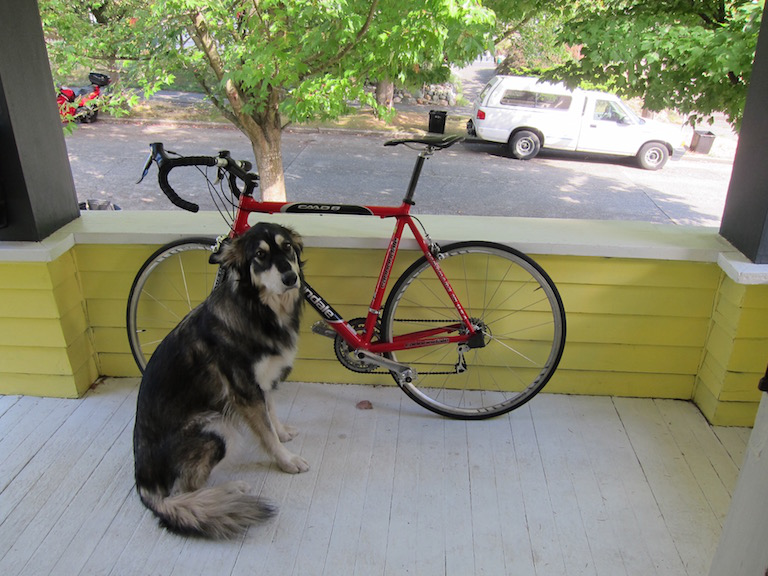

In [6]:
image = Image.open('dog.jpg') # 讀取範例圖片
image

In [7]:
yolo = YOLO() # 初始化 YOLO class

model_data/yolo.h5 model, anchors, and classes loaded.


In [8]:
r_image = yolo.detect_image(image) # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中

(416, 416, 3)
Found 3 boxes for img
dog 0.99 (128, 224) (314, 537)
truck 0.91 (475, 85) (689, 170)
bicycle 0.99 (162, 119) (565, 441)
3.8760867517412962


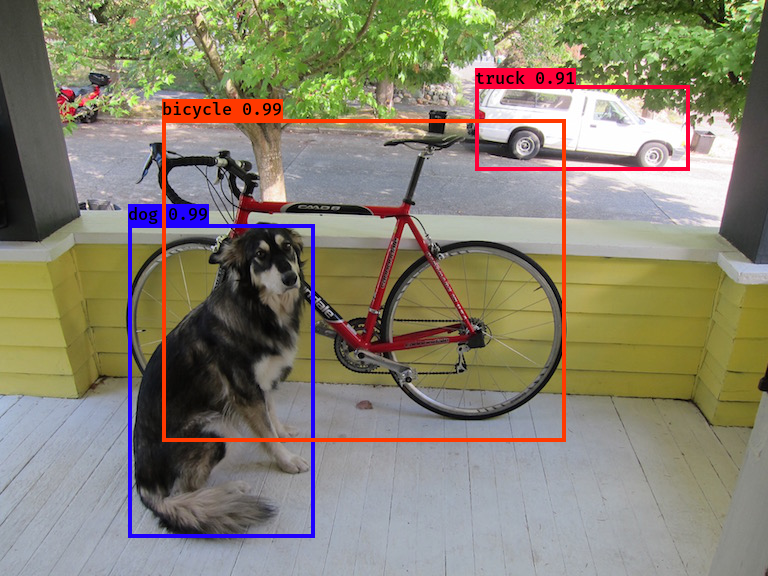

In [9]:
r_image # 顯示 r_image，可觀察到圖片上已畫上 yolov3 所檢測的 object

## 作業
該版本的 yolov3 實現邏輯主要寫在 `yolo.py` 中 `YOLO` 這個 class 的 `detect_image` ，其回傳已畫上檢測到的 bboxes 和物件類別的圖片。

1. 請嘗試閱讀及盡量理解 `detect_image` 的程式碼片段
2. 請修改/模仿 `detect_image` 的寫法，使其回傳 bboxes 的信息、信心度及 bboxes 對應的類別
